In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load and preprocess data
df = pd.read_excel('D:\\OLAP\\Coffee Data.xlsx')
df = df[['Order Date', 'Amount']]
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')
df = df.groupby('Order Date')['Amount'].sum().reset_index()
df = df.set_index('Order Date')

In [3]:
# Time Series Splitting
train_size = int(len(df) * 0.7)
train_dates = df.index[:train_size]
test_dates = df.index[train_size:]
y_train = df['Amount'][:train_size]
y_test = df['Amount'][train_size:]

In [4]:
# Moving Average Model
window_size = 7  
y_pred_test = df['Amount'].rolling(window=window_size).mean().iloc[train_size:]

In [5]:
# Future predictions (using the same rolling mean approach)
future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=365, freq='D')
future_predictions = []
last_values = list(df['Amount'].tail(window_size))

for i in range(365):  # Predict 365 days into the future
    next_pred = np.mean(last_values)
    future_predictions.append(next_pred)
    last_values.pop(0)  # Remove the oldest value
    last_values.append(next_pred) # Add the new prediction

In [6]:
# Evaluate the model (adjusting for initial NaN values and handling potential zero values in y_test)
y_test_valid = y_test[window_size - 1:]
y_pred_test_valid = y_pred_test[window_size - 1:]

mse = mean_squared_error(y_test_valid, y_pred_test_valid)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_valid, y_pred_test_valid)
mape = np.mean(np.abs((y_test_valid - y_pred_test_valid) / y_test_valid)) * 100


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 3294.3092780434554
Root Mean Squared Error (RMSE): 57.39607371626961
Mean Absolute Error (MAE): 44.682942430703626
Mean Absolute Percentage Error (MAPE): 159.9862724636272


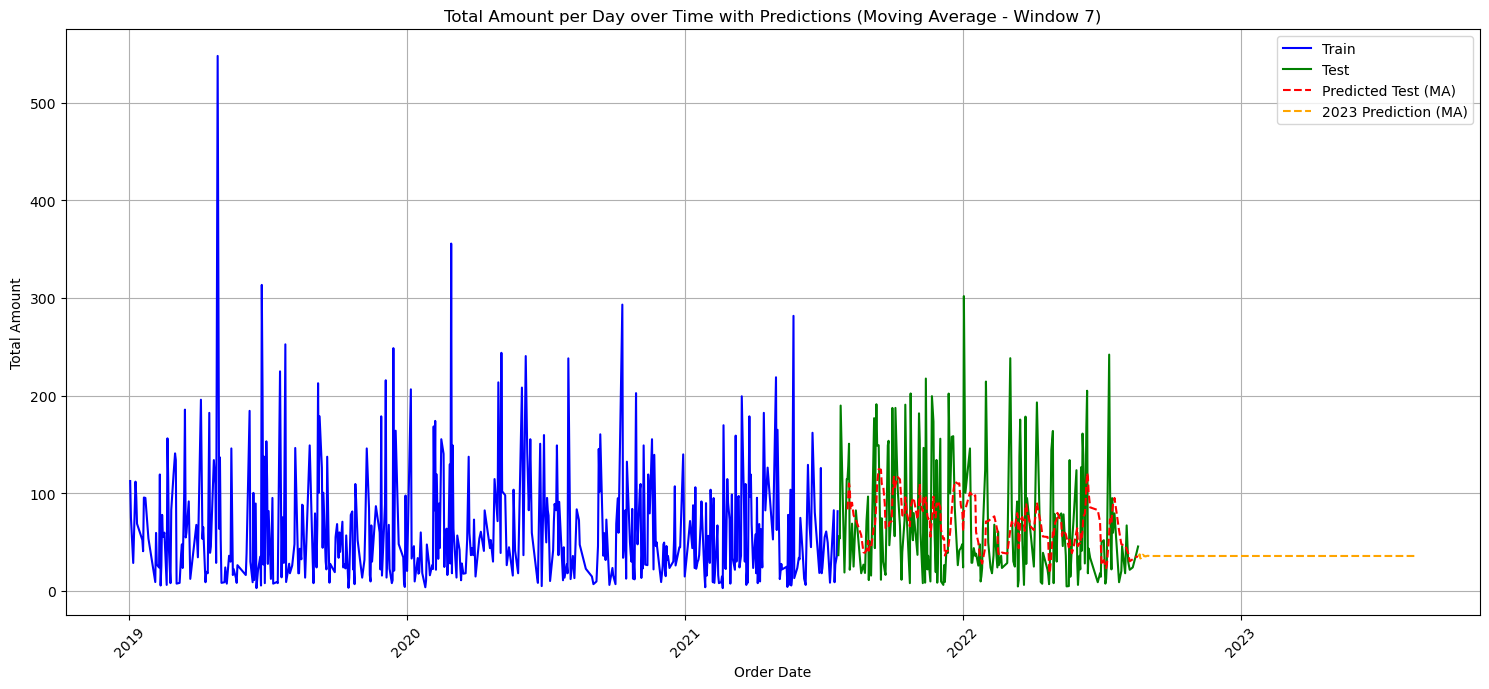

In [7]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(train_dates, y_train, label='Train', color='blue')
plt.plot(test_dates, y_test, label='Test', color='green')
plt.plot(test_dates[window_size-1:], y_pred_test[window_size-1:], label='Predicted Test (MA)', color='red', linestyle='--')  # Adjusted plot
plt.plot(future_dates, future_predictions, label='2023 Prediction (MA)', color='orange', linestyle='--')

plt.xlabel('Order Date')
plt.ylabel('Total Amount')
plt.title(f'Total Amount per Day over Time with Predictions (Moving Average - Window {window_size})')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()